In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(16,9))
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split , cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score,log_loss,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn import set_config
set_config(display='diagram')
from wordcloud import WordCloud

<Figure size 1152x648 with 0 Axes>

# EDA(Exploring Data and Understanding features doing univariate analysis,Bivariate analysis,Finding Distribution) and Data Cleaning(Finding Types of Features,Duplicate values,Missing Values,Outlier Detection)
# Feature Engineering((Imputting Missing Values,Outlier)) and Feature Selection and Feature Scaling
# Model Selection
# Model Building
# Model HyperParameterTuning
# Model Evaluation(Testing)

In [141]:
df = pd.read_csv(r'C:\Users\91998\Downloads\advertising.csv')

In [142]:
df.shape

(1000, 10)

In [143]:
df.sample()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
593,82.07,24,50337.93,193.97,Monitored local Internet solution,Richardsonmouth,0,Sri Lanka,2016-06-14 07:02:09,0


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [145]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [146]:
df.describe(include='object')

,Ad Topic Line,City,Country,Timestamp
count,1000,1000,1000,1000
unique,1000,969,237,1000
top,Cloned 5thgeneration orchestration,Lisamouth,France,2016-03-27 00:53:11
freq,1,3,9,1


In [147]:
for i in df.columns:
    print(f"no of unique values are {df[i].nunique()} and those values are ")
    print(f"{df[i].unique()}")

no of unique values are 900 and those values are 
[68.95 80.23 69.47 74.15 68.37 59.99 88.91 66.   74.53 69.88 47.64 83.07
 69.57 79.52 42.95 63.45 55.39 82.03 54.7  74.58 77.22 84.59 41.49 87.29
 41.39 78.74 48.53 51.95 70.2  76.02 67.64 86.41 59.05 55.6  57.64 84.37
 62.26 65.82 50.43 38.93 84.98 64.24 82.52 81.38 80.47 37.68 69.62 85.4
 44.33 48.01 73.18 79.94 33.33 50.33 62.31 80.6  65.19 44.98 77.63 41.82
 85.61 85.84 72.08 86.06 45.96 62.42 63.89 35.33 75.74 78.53 46.13 69.01
 55.35 33.21 38.46 64.1  49.81 82.73 56.14 55.13 78.11 73.46 56.64 68.94
 70.79 57.76 77.51 52.7  57.7  56.89 69.9  55.79 70.03 50.08 43.67 72.84
 45.72 39.94 35.61 79.71 63.6  89.91 68.18 66.49 80.49 72.23 42.39 47.53
 74.02 66.63 63.24 71.   69.   76.99 72.6  61.88 84.45 88.97 86.19 49.58
 77.65 37.75 62.33 79.57 80.31 89.05 70.41 67.36 46.98 41.67 51.24 75.7
 43.49 49.89 38.37 38.52 71.89 75.8  83.86 37.51 83.67 69.08 37.47 56.04
 70.92 49.78 68.61 58.18 78.54 37.   65.4  87.98 44.64 41.73 80.46 75.55
 76

[256.09 193.77 236.5  245.89 225.58 226.74 208.36 131.76 221.51 183.82
 122.02 230.87 113.12 214.23 143.56 140.64 129.41 187.53 118.39 135.51
 224.44 226.54 164.83 209.93 167.22 204.79 134.14 129.23 119.2  209.82
 267.01 207.48 169.23 212.58 133.81 201.58 125.45 221.94 119.32 162.08
 202.61 252.36 198.11 212.3  204.86 172.83 202.25 198.72 123.72 119.93
 196.71 225.29 193.58 133.2  119.3  177.55 150.61 129.31 239.22 156.36
 183.43 192.93 169.5  178.92 141.22 198.5  105.22 200.22 215.25 131.72
 139.01 222.63 153.17 167.07 145.98 215.93 120.06 238.99 113.53 111.71
 209.25 222.75 115.91 138.71 184.1  105.15 200.55 118.6  109.07 109.29
 138.35 149.67 227.72 125.85 166.29 238.63 154.02 156.3  158.22 211.65
 169.18 235.28 194.23 218.17 202.16 229.12 241.03 150.99 135.18 210.54
 176.98 235.78 211.87 123.64 221.21 244.34 162.95 112.19 207.18 152.49
 210.26 231.94 212.79 225.24 127.11 230.93 127.07 206.98 223.03 233.56
 175.37 132.55 176.73 215.44 127.83 160.03 140.46 137.28 172.81 146.19
 190.2

In [148]:
df.isnull().sum()/len(df)*100

Daily Time Spent on Site    0.0
Age                         0.0
Area Income                 0.0
Daily Internet Usage        0.0
Ad Topic Line               0.0
City                        0.0
Male                        0.0
Country                     0.0
Timestamp                   0.0
Clicked on Ad               0.0
dtype: float64

<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

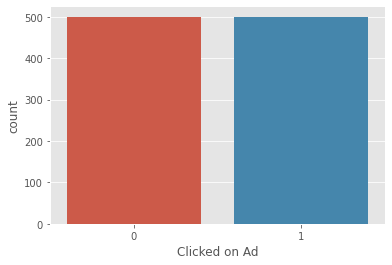

In [149]:
sns.countplot(data=df,x='Clicked on Ad')

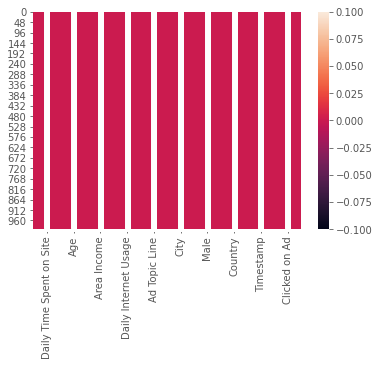

In [150]:
sns.heatmap(df.isnull() , annot=True) ;

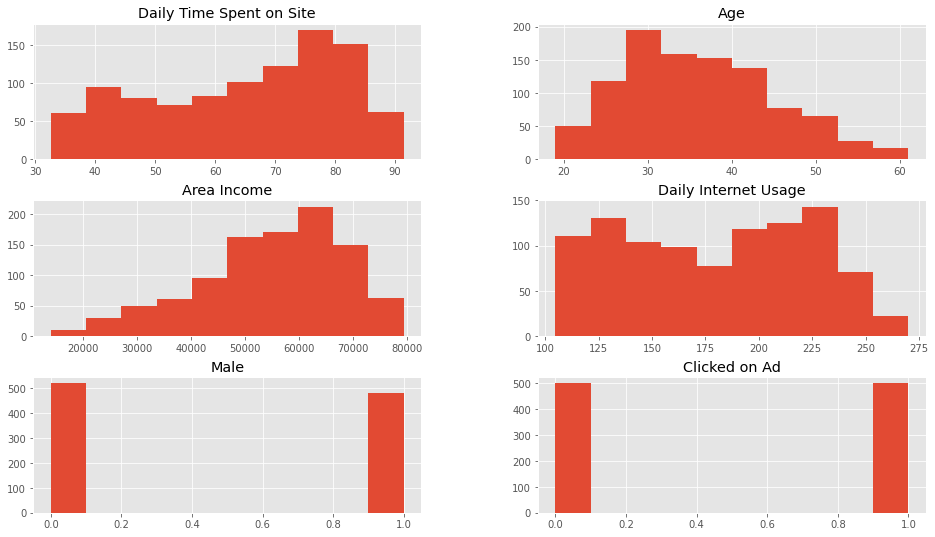

In [151]:
df.hist(figsize=(16,9));

<Figure size 1152x648 with 0 Axes>

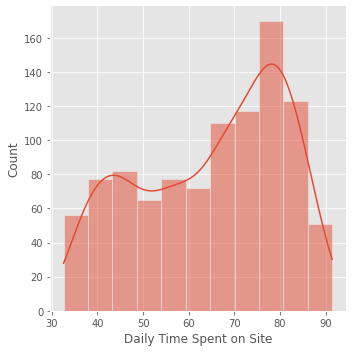

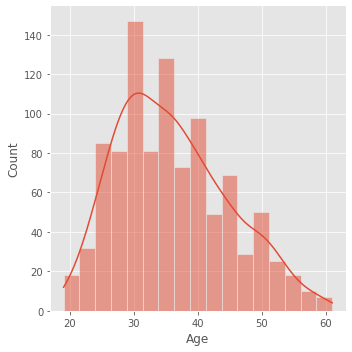

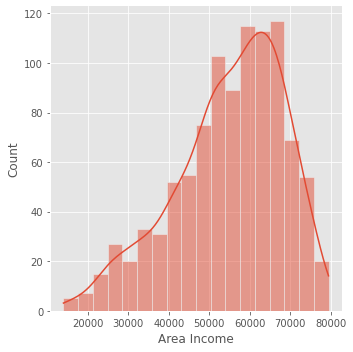

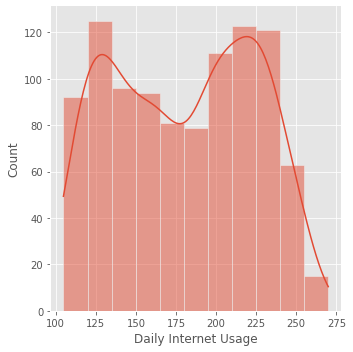

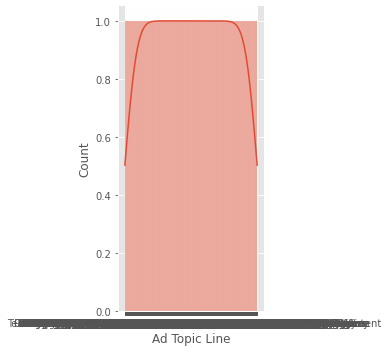

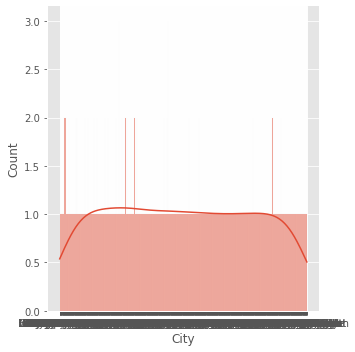

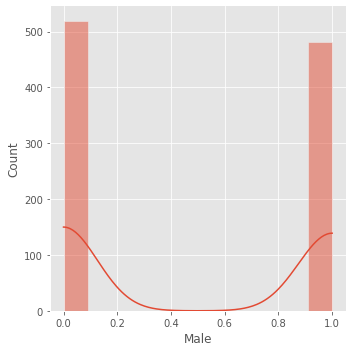

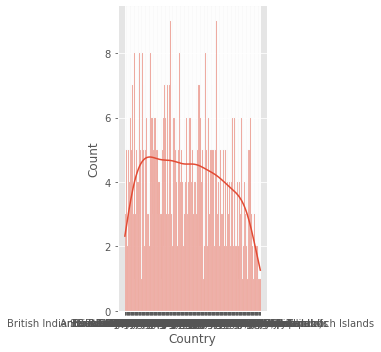

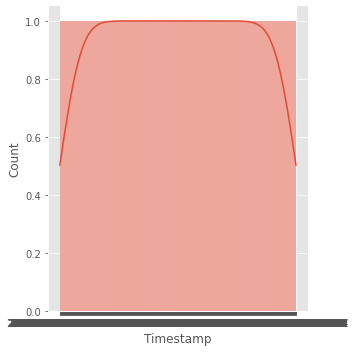

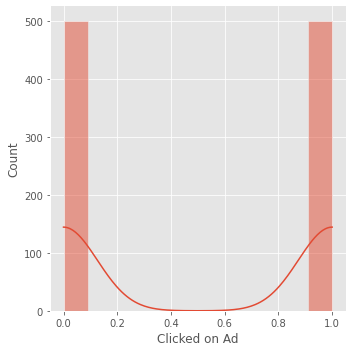

In [152]:
plt.figure(figsize=(16,9))
for i in df.columns:
    sns.displot(df[i] , kde=True);

In [153]:
df.sample()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
620,81.75,24,52656.13,190.08,Open-architected web-enabled benchmark,Kevinchester,1,Cape Verde,2016-04-29 18:53:43,0


array([[<AxesSubplot:title={'center':'Clicked on Ad'}>]], dtype=object)

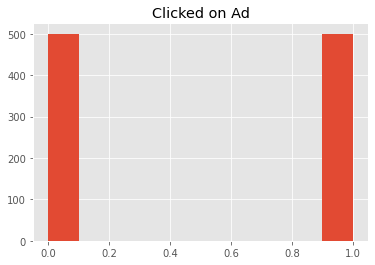

In [154]:
df.hist(column='Clicked on Ad' )

<AxesSubplot:>

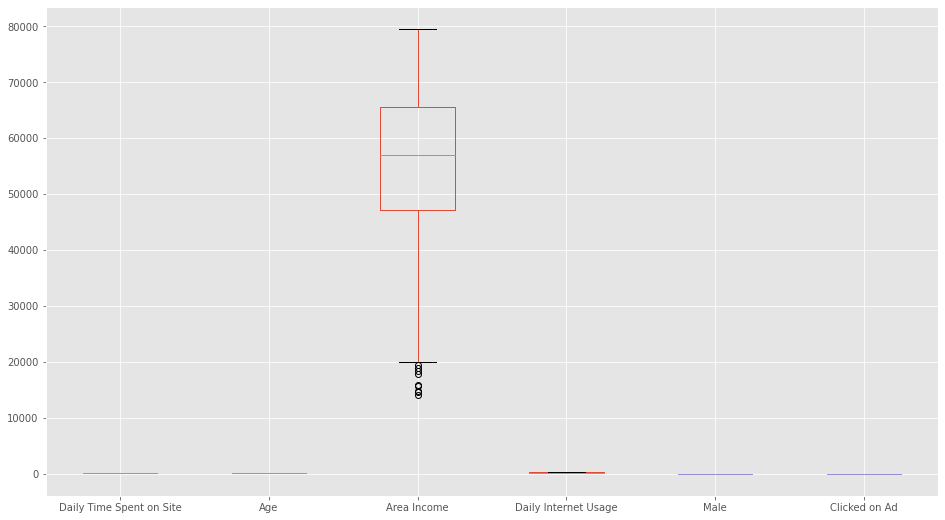

In [155]:
plt.figure(figsize=(16,9))
df.boxplot()

In [37]:
df.sample()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
704,76.02,40,73174.19,219.55,Distributed leadingedge orchestration,Lesliefort,0,Malta,2016-07-13 14:30:14,0


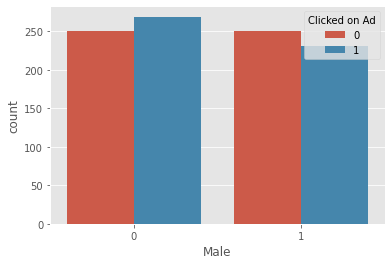

In [156]:
sns.countplot(data=df , x='Male',hue='Clicked on Ad');

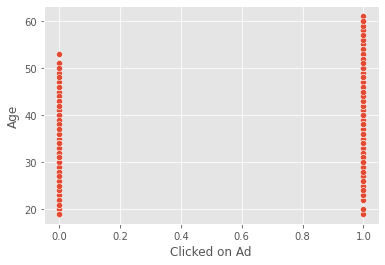

In [157]:
sns.scatterplot(data =df , x='Clicked on Ad',y='Age');

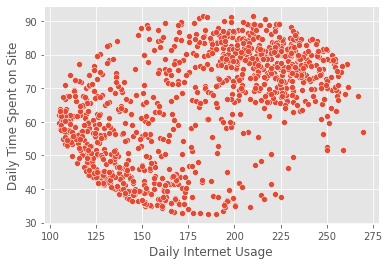

In [158]:
sns.scatterplot(data =df , x='Daily Internet Usage',y='Daily Time Spent on Site');

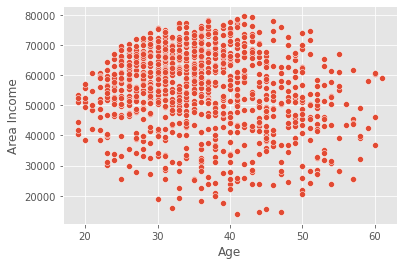

In [159]:
sns.scatterplot(data =df , x='Age',y='Area Income');

In [160]:
df.sample()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
409,35.34,45,46693.76,152.86,De-engineered actuating hierarchy,East Brittanyville,0,Taiwan,2016-06-18 16:32:58,1


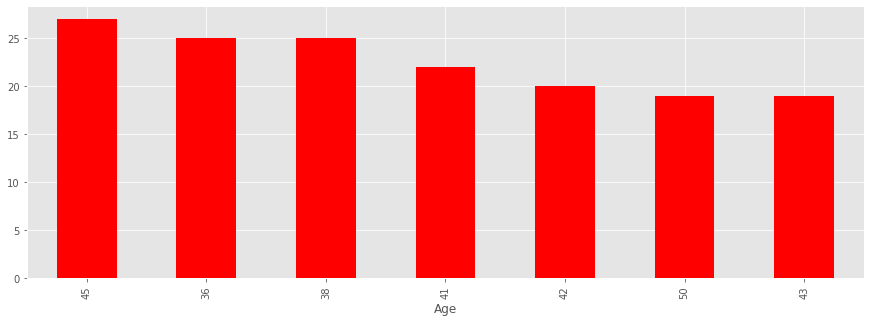

In [161]:
df1=df[df['Clicked on Ad']==1]
df1.groupby('Age')['Clicked on Ad'].count().sort_values(ascending=False).head(7).plot.bar(figsize=(15,5), color="Red");

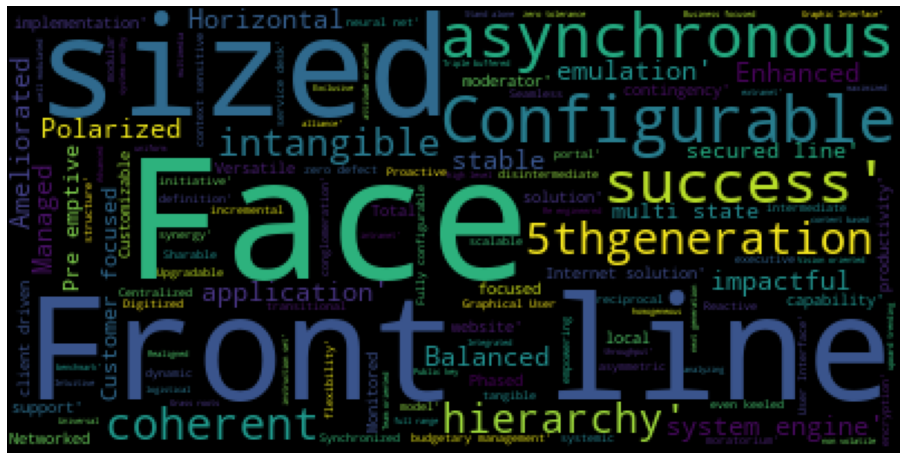

In [162]:
plt.figure(figsize=(16,9))
text = df['Ad Topic Line'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [163]:
df.sample()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
727,81.17,30,57195.96,231.91,Optimized static archive,Dayton,1,United States Minor Outlying Islands,2016-06-03 07:00:36,0


<AxesSubplot:xlabel='Country'>

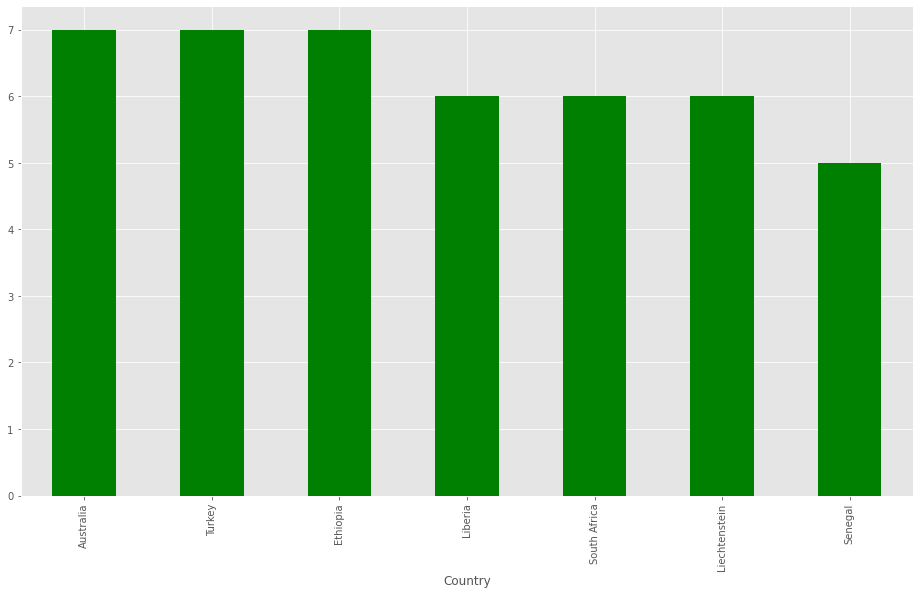

In [164]:
df2=df[df['Clicked on Ad']==1]
df2.groupby('Country')['Clicked on Ad'].count().sort_values(ascending=False).head(7).plot.bar(figsize=(16,9) , color='green')

In [165]:
df.groupby('City')['Clicked on Ad'].count()

City
Adamsbury        1
Adamside         1
Adamsstad        1
Alanview         1
Alexanderfurt    1
                ..
Youngburgh       1
Youngfort        1
Yuton            1
Zacharystad      1
Zacharyton       1
Name: Clicked on Ad, Length: 969, dtype: int64

<AxesSubplot:xlabel='City'>

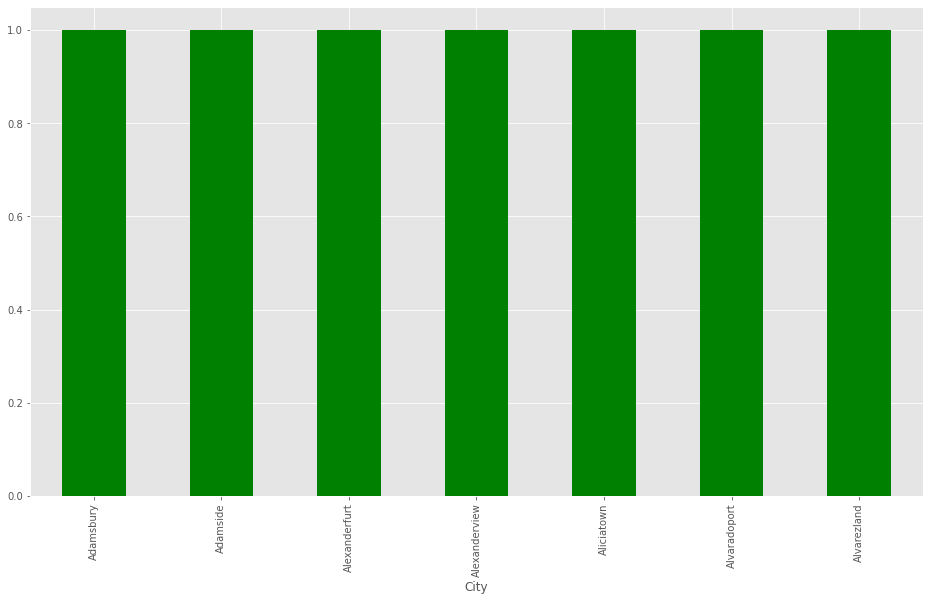

In [166]:
df3=df[df['Clicked on Ad']==1]
df3.groupby('City')['Clicked on Ad'].count().head(7).plot.bar(figsize=(16,9) , color='green')

In [167]:
df.sample()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
930,80.94,36,60803.0,239.94,Self-enabling local strategy,North Tiffany,0,Bermuda,2016-01-01 05:31:22,0


In [168]:
df['hour']=pd.to_datetime(df['Timestamp']).dt.hour

In [169]:
df.sample()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,hour
428,60.53,29,56759.48,123.28,Networked even-keeled workforce,Williamsport,0,Papua New Guinea,2016-05-09 10:21:48,1,10


In [170]:
df['night_time']=np.where(df['hour']>=20,1,0)

In [171]:
df.drop(columns=['hour'] , inplace=True)

In [172]:
df.sample()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,night_time
746,66.8,29,59683.16,248.51,Diverse leadingedge website,Lake Brandonview,0,Hungary,2016-07-11 13:23:37,1,0


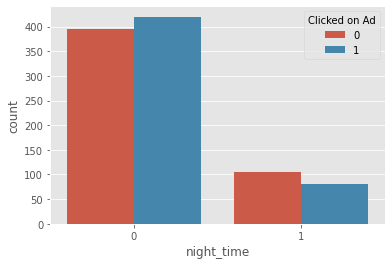

In [173]:
sns.countplot(data=df,x='night_time',hue='Clicked on Ad');

In [174]:
df.corr()['Clicked on Ad']

Daily Time Spent on Site   -0.748117
Age                         0.492531
Area Income                -0.476255
Daily Internet Usage       -0.786539
Male                       -0.038027
Clicked on Ad               1.000000
night_time                 -0.064384
Name: Clicked on Ad, dtype: float64

In [175]:
main_df = df[['Daily Time Spent on Site','Age','Daily Internet Usage','Clicked on Ad']]

In [176]:
main_df.sample()

,Daily Time Spent on Site,Age,Daily Internet Usage,Clicked on Ad
51,79.94,28,225.29,0


In [177]:
X = main_df.drop(columns=['Clicked on Ad'])

In [178]:
X.sample()

,Daily Time Spent on Site,Age,Daily Internet Usage
361,62.14,41,110.93


In [179]:
y = main_df['Clicked on Ad']

In [180]:
trf1 = ColumnTransformer([
    ('scale',StandardScaler(),slice(0,3))
])

In [181]:
# train the model
trf2 = SVC()

In [182]:
# Alternate Syntax
pipe = make_pipeline(trf1,trf2)

In [183]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  slice(0, 3, None))])),
                ('svc', SVC())])

In [184]:
# Code here
pipe.named_steps

{'columntransformer': ColumnTransformer(transformers=[('scale', StandardScaler(), slice(0, 3, None))]),
 'svc': SVC()}

In [185]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X, y, cv=10, scoring='accuracy').mean()

0.9559999999999998

In [186]:
kf=KFold()

In [187]:
scores = []
i = 1
for train_set, test_set in kf.split(X):
    pipe.fit(X.loc[train_set], y[train_set])
    sco = pipe.score(X.loc[test_set], y[test_set])
    scores.append(sco)
    print("iteration ", i)
    i += 1

iteration  1
iteration  2
iteration  3
iteration  4
iteration  5


In [188]:
np.array(scores).mean()

0.958

In [189]:
scores

[0.96, 0.965, 0.965, 0.93, 0.97]

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [191]:
# train
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  slice(0, 3, None))])),
                ('svc', SVC())])

In [192]:
y_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.955

In [195]:
accuracy_score(y_train,y_train_pred)

0.96125

In [196]:
main_df.sample()

,Daily Time Spent on Site,Age,Daily Internet Usage,Clicked on Ad
698,86.76,28,189.91,0


In [197]:
test_input2= np.array([84.95,34,230.36],dtype=object).reshape(1,3)

In [198]:
test_input2

array([[84.95, 34, 230.36]], dtype=object)

In [199]:
pipe.predict(test_input2)

c:\python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [200]:
#Mushroom Class Prediction as Edible or Poisionious

In [254]:
df_mushroom = pd.read_csv(r'C:\Users\91998\Music\mushrooms.csv')

In [255]:
df_mushroom.sample(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
6649,p,f,y,n,f,y,f,c,n,b,...,s,w,w,p,w,o,e,w,v,l
4227,p,f,y,g,f,f,f,c,b,h,...,k,n,p,p,w,o,l,h,v,p
8102,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,n,c,l


In [256]:
df_mushroom.shape

(8124, 23)

In [257]:
df_mushroom.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [258]:
df_mushroom['class']=df_mushroom['class'].map({'p':1,'e':0})

In [259]:
X=df_mushroom.drop(columns=['class'])

In [260]:
y=df_mushroom['class']

In [261]:
X.shape

(8124, 22)

In [262]:
X.sample()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
4495,f,f,y,f,f,f,c,b,h,e,...,k,p,b,p,w,o,l,h,y,p


In [263]:
# one hot encoding
trf1 = ColumnTransformer([
    ('ohe_sex_embarked',OneHotEncoder(sparse=False,handle_unknown='ignore'),slice(0,22))
])

In [264]:
trf1.get_feature_names

<bound method ColumnTransformer.get_feature_names of ColumnTransformer(transformers=[('ohe_sex_embarked',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 slice(0, 22, None))])>

In [265]:
# train the model
trf2 = SVC()

In [266]:
# Alternate Syntax
pipe = make_pipeline(trf1,trf2)

In [267]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  slice(0, 22, None))])),
                ('svc', SVC())])

In [268]:
pipe.named_steps

{'columntransformer': ColumnTransformer(transformers=[('ohe_sex_embarked',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  slice(0, 22, None))]),
 'svc': SVC()}

In [269]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X, y, cv=10, scoring='accuracy').mean()

0.9584131629493635

In [270]:
kf=KFold()

In [271]:
scores = []
i = 1
for train_set, test_set in kf.split(X):
    pipe.fit(X.loc[train_set], y[train_set])
    sco = pipe.score(X.loc[test_set], y[test_set])
    scores.append(sco)
    print("iteration ", i)
    i += 1

iteration  1
iteration  2
iteration  3
iteration  4
iteration  5


In [272]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [273]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  slice(0, 22, None))])),
                ('svc', SVC())])

In [274]:
y_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [275]:
accuracy_score(y_train,y_train_pred)

1.0